<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/SDN_DDoS_Ensemble_ML/blob/main/kdd_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

# Check the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# List files in the dataset directory
dataset_directory = 'nsl_kdd'
if os.path.exists(dataset_directory):
    print("Files and directories in '", dataset_directory, "':")
    print(os.listdir(dataset_directory))
else:
    print(f"The directory {dataset_directory} does not exist.")

# Load the dataset (assuming KDDTrain+.txt and KDDTest+.txt are part of the NSL-KDD dataset)
train_path = os.path.join(dataset_directory, '/content/KDDTrain+.txt')
test_path = os.path.join(dataset_directory, '/content/KDDTest+.txt')

column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate' ,
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'class', 'level']

train_data = pd.read_csv(train_path, header=None, names=column_names)
test_data = pd.read_csv(test_path, header=None, names=column_names)

print("Training Data Sample:")
print(train_data.head())

print("Test Data Sample:")
print(test_data.head())


Current Working Directory: /content
The directory nsl_kdd does not exist.
Training Data Sample:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03         

In [ ]:
# Convert class labels to 'normal' and 'attack'
train_data.loc[train_data['class'] == "normal", "class"] = 'normal'
train_data.loc[train_data['class'] != 'normal', "class"] = 'attack'

test_data.loc[test_data['class'] == "normal", "class"] = 'normal'
test_data.loc[test_data['class'] != 'normal', "class"] = 'attack'

print("Training Data Sample:")
print(train_data.head())

print("Test Data Sample:")
print(test_data.head())

Training Data Sample:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         

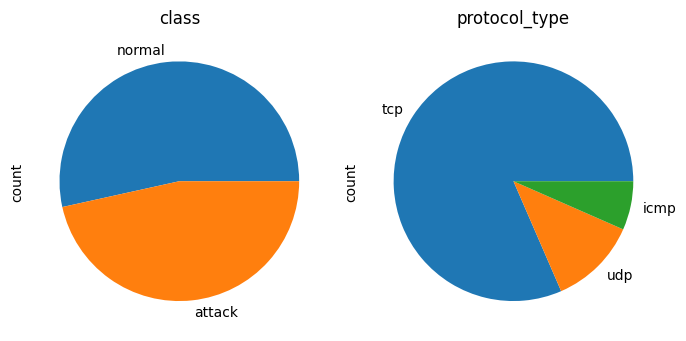

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(7, 7))
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', fontsize=10)
        ax.set_title(str(col), fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the pie_plot function
pie_plot(train_data, ['class', 'protocol_type', 'flag'], 1, 2)


In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

dropped_columns = [
    'is_host_login', 'land', 'logged_in', 'is_guest_login', 'level', 'class'
]

def Scaling(data, columns):
    scaler = RobustScaler()
    scaler_fit_transform = scaler.fit_transform(data)
    return pd.DataFrame(scaler_fit_transform, columns=columns)

def preprocess(data):
    # One-hot encode categorical columns
    data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])

    # Drop specified columns
    preprocess_df = data.drop(dropped_columns, axis=1)
    preprocess_columns = preprocess_df.columns

    # Scale remaining numeric columns
    scaled_df = Scaling(preprocess_df, preprocess_columns)

    # Update original dataframe
    data.drop(labels=preprocess_columns, axis="columns", inplace=True)
    data[preprocess_columns] = scaled_df[preprocess_columns]

    # Convert 'class' column to binary
    data['class'] = data['class'].map({'normal': 0, 'attack': 1})

    return data

# Perform preprocessing on train_data
train_data = preprocess(train_data)
print("Scaled Training Data:")
print(train_data.head())

# Perform preprocessing on test_data
test_data = preprocess(test_data)
print("\nScaled Test Data:")
print(test_data.head())


<ipython-input-58-053c559409c4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[preprocess_columns] = scaled_df[preprocess_columns]
<ipython-input-58-053c559409c4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[preprocess_columns] = scaled_df[preprocess_columns]
<ipython-input-58-053c559409c4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

Scaled Training Data:
   land  logged_in  is_host_login  is_guest_login  class  level  duration  \
0     0          0              0               0      0     20       0.0   
1     0          0              0               0      0     15       0.0   
2     0          0              0               0      1     19       0.0   
3     0          1              0               0      0     21       0.0   
4     0          1              0               0      0     21       0.0   

   src_bytes  dst_bytes  wrong_fragment  ...  flag_REJ  flag_RSTO  \
0   1.619565   0.000000             0.0  ...       0.0        0.0   
1   0.369565   0.000000             0.0  ...       0.0        0.0   
2  -0.159420   0.000000             0.0  ...       0.0        0.0   
3   0.681159  15.800388             0.0  ...       0.0        0.0   
4   0.561594   0.813953             0.0  ...       0.0        0.0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0          0.0        0.0 

<ipython-input-58-053c559409c4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[preprocess_columns] = scaled_df[preprocess_columns]
<ipython-input-58-053c559409c4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[preprocess_columns] = scaled_df[preprocess_columns]
<ipython-input-58-053c559409c4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

In [ ]:
print(train_data.head())

   land  logged_in  is_host_login  is_guest_login  class  level  duration  \
0     0          0              0               0      0     20       0.0   
1     0          0              0               0      0     15       0.0   
2     0          0              0               0      1     19       0.0   
3     0          1              0               0      0     21       0.0   
4     0          1              0               0      0     21       0.0   

   src_bytes  dst_bytes  wrong_fragment  ...  flag_REJ  flag_RSTO  \
0   1.619565   0.000000             0.0  ...       0.0        0.0   
1   0.369565   0.000000             0.0  ...       0.0        0.0   
2  -0.159420   0.000000             0.0  ...       0.0        0.0   
3   0.681159  15.800388             0.0  ...       0.0        0.0   
4   0.561594   0.813953             0.0  ...       0.0        0.0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0          0.0        0.0      0.0      0.0     

In [ ]:
# Create x, y, and y_reg variables
x_train = scaled_train_data.drop(['class', 'level'], axis=1).values
y_train = train_data['class'].values
y_reg_train = train_data['level'].values

x_test = scaled_test_data.drop(['class', 'level'], axis=1).values
y_test = test_data['class'].values
y_reg_test = test_data['level'].values

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA on training data
n_components = 20
pca = PCA(n_components).fit(x_train)
x_train_reduced = pca.transform(x_train)

print("Reduced Training Data after PCA:")
print(x_train_reduced)

print(f"The original features before PCA: {x_train.shape[1]}")
print(f"Reduced features after PCA: {x_train_reduced.shape[1]}")

# Fit separate PCA model for test data
pca_test = PCA(n_components).fit(x_test)
x_test_reduced = pca_test.transform(x_test)

print("\nReduced Test Data after PCA:")
print(x_test_reduced)


Reduced Training Data after PCA:
[[-1.65840378e+02 -4.20552258e+01 -2.85170803e+02 ... -3.01151379e-01
  -1.63304925e-01 -6.21599996e-01]
 [-1.67090327e+02 -4.20548218e+01 -2.85152307e+02 ... -2.73902176e-02
  -3.11232299e-01 -2.68599649e-01]
 [-1.67619296e+02 -4.20548639e+01 -2.85156469e+02 ... -1.29094206e-01
   4.48594943e-01  9.99798441e-02]
 ...
 [-1.59536199e+02 -4.13124964e+01 -2.85237159e+02 ... -8.38524913e-01
  -7.27193558e-03  2.50634194e-01]
 [-1.67619296e+02 -4.20548639e+01 -2.85156487e+02 ... -7.75882026e-02
  -3.66609390e-01 -6.35557246e-03]
 [-1.67072215e+02 -4.20549399e+01 -2.85158999e+02 ... -9.06914507e-01
  -3.20147946e-02 -5.61426845e-01]]
The original features before PCA: 122
Reduced features after PCA: 20

Reduced Test Data after PCA:
[[-3.80743390e+01 -2.18551298e+02 -3.03637801e+00 ... -9.77387627e-02
   7.02198053e-02 -2.16340174e-01]
 [-3.80743188e+01 -2.18551131e+02 -3.03303901e+00 ... -7.06722912e-02
   1.21479975e-01 -3.57916185e-01]
 [ 7.17946724e+00 -2.1

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming y_reg is the target variable for regression
y_reg = train_data['level'].values  # Assuming 'level' is the column for regression target in the training data

# Split the regression target into training and test sets
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    train_data.drop(columns=['class', 'level']),  # Drop 'class' and 'level' columns for regression data
    y_reg,
    test_size=0.2,  # Adjust test size as needed
    random_state=42
)

print("Shapes of regression data:")
print("x_train_reg:", x_train_reg.shape)
print("x_test_reg:", x_test_reg.shape)
print("y_train_reg:", y_train_reg.shape)
print("y_test_reg:", y_test_reg.shape)


Shapes of regression data:
x_train_reg: (100778, 122)
x_test_reg: (25195, 122)
y_train_reg: (100778,)
y_test_reg: (25195,)


In [ ]:
print(x_train_reg)

        land  logged_in  is_host_login  is_guest_login  duration  src_bytes  \
95141      0          1              0               0       0.0   0.615942   
37486      0          0              0               0       0.0  -0.159420   
34926      0          0              0               0       0.0  -0.159420   
34589      0          1              0               0       0.0   0.771739   
11420      0          0              0               0       0.0   1.710145   
...      ...        ...            ...             ...       ...        ...   
119879     0          0              0               0       0.0  -0.159420   
103694     0          0              0               0       0.0  -0.159420   
860        0          0              0               0       0.0  -0.159420   
15795      0          1              0               0       0.0   0.960145   
121958     0          0              0               0       0.0  -0.003623   

        dst_bytes  wrong_fragment  urgent  hot  ...

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score,accuracy_score
import numpy as np

# Assuming x_train_reg, y_train_reg, x_test_reg, and y_test_reg are already defined
# Initialize MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Train the MLPRegressor model
mlp_regressor.fit(x_train_reg, y_train_reg)

# Predict using the trained model
y_pred_reg = mlp_regressor.predict(x_test_reg)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Mean Absolute Error:", mae)

# Evaluate the model using R-squared score
r2 = r2_score(y_test_reg, y_pred_reg)
print("R-squared Score:", r2)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Convert regression outputs to binary categories
threshold = 0.5  # You can adjust this threshold based on your specific problem
y_pred_binary = (y_pred_reg >= threshold).astype(int)
y_test_binary = (y_test_reg >= threshold).astype(int)

# Calculate F1 score
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

# Calculate Recall
recall = recall_score(y_test_binary, y_pred_binary)
print("Recall:", recall)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)


Mean Squared Error: 220160.97927499018
Mean Absolute Error: 5.332839942639763
R-squared Score: -40259.56960867927
Root Mean Squared Error: 469.2131490857755
F1 Score: 0.9996227988326616
Recall: 0.9998808530918623
Accuracy: 0.9992458821194682


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score, accuracy_score
import numpy as np

# Assuming x_train_reg, y_train_reg, x_test_reg, and y_test_reg are already defined
# Initialize SGDRegressor
sgd_regressor = SGDRegressor(random_state=42)

# Train the SGDRegressor model
sgd_regressor.fit(x_train_reg, y_train_reg)

# Predict using the trained model
y_pred_reg = sgd_regressor.predict(x_test_reg)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Mean Absolute Error:", mae)

# Evaluate the model using R-squared score
r2 = r2_score(y_test_reg, y_pred_reg)
print("R-squared Score:", r2)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Convert regression outputs to binary categories
threshold = 0.5  # You can adjust this threshold based on your specific problem
y_pred_binary = (y_pred_reg >= threshold).astype(int)
y_test_binary = (y_test_reg >= threshold).astype(int)

# Calculate F1 score
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

# Calculate Recall
recall = recall_score(y_test_binary, y_pred_binary)
print("Recall:", recall)

# Calculate Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)


Mean Squared Error: 4.200732118011915e+37
Mean Absolute Error: 6.667834848341406e+16
R-squared Score: -7.681827560977129e+36
Root Mean Squared Error: 6.481305515104125e+18
F1 Score: 0.7990080358633188
Recall: 0.6653957663131975
Accuracy: 0.6654494939472118


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import Binarizer

# Assuming x_train_reg, y_train_reg, x_test_reg, and y_test_reg are already defined
# Initialize BernoulliNB
bernoulli_nb = BernoulliNB()

# Binarize the features
binarizer = Binarizer()
x_train_bin = binarizer.fit_transform(x_train_reg)
x_test_bin = binarizer.transform(x_test_reg)

# Train the BernoulliNB model
bernoulli_nb.fit(x_train_bin, y_train_reg)

# Predict using the trained model
y_pred_bin = bernoulli_nb.predict(x_test_bin)

# Evaluate the model using Accuracy
accuracy = accuracy_score(y_test_reg, y_pred_bin)
print("Accuracy:", accuracy)

# Evaluate the model using F1 Score (Micro Average for multiclass)
f1_micro = f1_score(y_test_reg, y_pred_bin, average='micro')
print("F1 Score (Micro Average):", f1_micro)

# Evaluate the model using F1 Score (Macro Average for multiclass)
f1_macro = f1_score(y_test_reg, y_pred_bin, average='macro')
print("F1 Score (Macro Average):", f1_macro)

# Evaluate the model using F1 Score (Weighted Average for multiclass)
f1_weighted = f1_score(y_test_reg, y_pred_bin, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

# Evaluate the model using Recall (Micro Average for multiclass)
recall_micro = recall_score(y_test_reg, y_pred_bin, average='micro')
print("Recall (Micro Average):", recall_micro)

# Evaluate the model using Recall (Macro Average for multiclass)
recall_macro = recall_score(y_test_reg, y_pred_bin, average='macro')
print("Recall (Macro Average):", recall_macro)

# Evaluate the model using Recall (Weighted Average for multiclass)
recall_weighted = recall_score(y_test_reg, y_pred_bin, average='weighted')
print("Recall (Weighted Average):", recall_weighted)

# Evaluate the model using Precision (Micro Average for multiclass)
precision_micro = precision_score(y_test_reg, y_pred_bin, average='micro')
print("Precision (Micro Average):", precision_micro)

# Evaluate the model using Precision (Macro Average for multiclass)
precision_macro = precision_score(y_test_reg, y_pred_bin, average='macro')
print("Precision (Macro Average):", precision_macro)

# Evaluate the model using Precision (Weighted Average for multiclass)
precision_weighted = precision_score(y_test_reg, y_pred_bin, average='weighted')
print("Precision (Weighted Average):", precision_weighted)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_reg, y_pred_bin)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.49331216511212544
F1 Score (Micro Average): 0.49331216511212544
F1 Score (Macro Average): 0.15854755758669756
F1 Score (Weighted Average): 0.5017110380427403
Recall (Micro Average): 0.49331216511212544
Recall (Macro Average): 0.20255252751018737
Recall (Weighted Average): 0.49331216511212544
Precision (Micro Average): 0.49331216511212544
Precision (Macro Average): 0.16992625261062996
Precision (Weighted Average): 0.5797807774006016
Confusion Matrix:
 [[   5    0    1    0    0    0    0    0    0    0    0    0    0    0
     1    0    0    0    0    0    1    8]
 [   0    3    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    4    2    1    0    0    4]
 [   0    0    0    0    1    0    0    2    0    0    0    1    0    0
     0    0    0    0    2    0    0    4]
 [   1    0    2    0    0    0    0    0    0    0    0    0    0    0
     1    5    2    0    0    0    2    1]
 [   0    1    5    0    5    0    0    0    0    0    1    1    0    0
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming x_train_reg, y_train_reg, x_test_reg, and y_test_reg are already defined
# Initialize Passive Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier(random_state=42)

# Train the Passive Aggressive Classifier model
pa_classifier.fit(x_train_reg, y_train_reg)

# Predict using the trained model
y_pred_pa = pa_classifier.predict(x_test_reg)

# Evaluate the model using Accuracy
accuracy = accuracy_score(y_test_reg, y_pred_pa)
print("Accuracy:", accuracy)

# Evaluate the model using F1 Score (Micro Average for multiclass)
f1_micro = f1_score(y_test_reg, y_pred_bin, average='micro')
print("F1 Score (Micro Average):", f1_micro)

# Evaluate the model using F1 Score (Macro Average for multiclass)
f1_macro = f1_score(y_test_reg, y_pred_bin, average='macro')
print("F1 Score (Macro Average):", f1_macro)

# Evaluate the model using F1 Score (Weighted Average for multiclass)
f1_weighted = f1_score(y_test_reg, y_pred_bin, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

# Evaluate the model using Recall (Micro Average for multiclass)
recall_micro = recall_score(y_test_reg, y_pred_bin, average='micro')
print("Recall (Micro Average):", recall_micro)

# Evaluate the model using Recall (Macro Average for multiclass)
recall_macro = recall_score(y_test_reg, y_pred_bin, average='macro')
print("Recall (Macro Average):", recall_macro)

# Evaluate the model using Recall (Weighted Average for multiclass)
recall_weighted = recall_score(y_test_reg, y_pred_bin, average='weighted')
print("Recall (Weighted Average):", recall_weighted)

# Evaluate the model using Precision (Micro Average for multiclass)
precision_micro = precision_score(y_test_reg, y_pred_bin, average='micro')
print("Precision (Micro Average):", precision_micro)

# Evaluate the model using Precision (Macro Average for multiclass)
precision_macro = precision_score(y_test_reg, y_pred_bin, average='macro')
print("Precision (Macro Average):", precision_macro)

# Evaluate the model using Precision (Weighted Average for multiclass)
precision_weighted = precision_score(y_test_reg, y_pred_bin, average='weighted')
print("Precision (Weighted Average):", precision_weighted)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_reg, y_pred_bin)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.5490375074419528
F1 Score (Micro Average): 0.49331216511212544
F1 Score (Macro Average): 0.15854755758669756
F1 Score (Weighted Average): 0.5017110380427403
Recall (Micro Average): 0.49331216511212544
Recall (Macro Average): 0.20255252751018737
Recall (Weighted Average): 0.49331216511212544
Precision (Micro Average): 0.49331216511212544
Precision (Macro Average): 0.16992625261062996
Precision (Weighted Average): 0.5797807774006016
Confusion Matrix:
 [[   5    0    1    0    0    0    0    0    0    0    0    0    0    0
     1    0    0    0    0    0    1    8]
 [   0    3    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    4    2    1    0    0    4]
 [   0    0    0    0    1    0    0    2    0    0    0    1    0    0
     0    0    0    0    2    0    0    4]
 [   1    0    2    0    0    0    0    0    0    0    0    0    0    0
     1    5    2    0    0    0    2    1]
 [   0    1    5    0    5    0    0    0    0    0    1    1    0    0
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import Binarizer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Assuming x_train_reg, y_train_reg, x_test_reg, and y_test_reg are already defined
# Example of data creation for context
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.3, random_state=42)

# Binarize the features
binarizer = Binarizer()
x_train_bin = binarizer.fit_transform(x_train_reg)
x_test_bin = binarizer.transform(x_test_reg)

# Initialize individual classifiers
bernoulli_nb = BernoulliNB()
passive_aggressive = PassiveAggressiveClassifier(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)
mlp_classifier = MLPClassifier(max_iter=1000, random_state=42)  # Increased max_iter

# Create a voting classifier with hard voting
voting_classifier = VotingClassifier(
    estimators=[('nb', bernoulli_nb), ('pa', passive_aggressive), ('sgd', sgd_classifier), ('mlp', mlp_classifier)],
    voting='hard'  # Use hard voting
)

# Train the voting classifier
voting_classifier.fit(x_train_bin, y_train_reg)

# Predict using the trained voting classifier
y_pred_ensemble = voting_classifier.predict(x_test_bin)

# Evaluate the ensemble model using Accuracy
accuracy_ensemble = accuracy_score(y_test_reg, y_pred_ensemble)
print("Accuracy (Ensemble):", accuracy_ensemble)

# Evaluate the ensemble model using F1 Score (Weighted Average for multiclass)
f1_ensemble = f1_score(y_test_reg, y_pred_ensemble, average='weighted')
print("F1 Score (Ensemble - Weighted Average):", f1_ensemble)


Accuracy (Ensemble): 0.6564794602103592
F1 Score (Ensemble - Weighted Average): 0.6394881795040669


In [ ]:
from sklearn.metrics import recall_score

# Calculate the recall score for the ensemble model
recall_ensemble = recall_score(y_test_reg, y_pred_ensemble, average='weighted')
print("Recall Score (Ensemble - Weighted Average):", recall_ensemble)


Recall Score (Ensemble - Weighted Average): 0.6564794602103592


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Assuming x_train_reg, y_train_reg, x_test_reg, and y_test_reg are already defined

# Initialize classifiers
bernoulli_nb = BernoulliNB()
passive_aggressive = PassiveAggressiveClassifier()
sgd_classifier = SGDClassifier()
mlp_classifier = MLPClassifier()

# Fit classifiers with training data
bernoulli_nb.fit(x_train_bin, y_train_reg)
passive_aggressive.fit(x_train_bin, y_train_reg)
sgd_classifier.fit(x_train_bin, y_train_reg)
mlp_classifier.fit(x_train_bin, y_train_reg)

# Initialize the VotingClassifier with the fitted classifiers
estimators = [('nb', bernoulli_nb), ('pa', passive_aggressive), ('sgd', sgd_classifier), ('mlp', mlp_classifier)]
voting_classifier = VotingClassifier(estimators=estimators, voting='hard')

# Fit the VotingClassifier
voting_classifier.fit(x_train_bin, y_train_reg)

# Predict using the trained voting classifier
y_pred_ensemble = voting_classifier.predict(x_test_bin)

# Calculate confusion matrices for each model
cm_nb = confusion_matrix(y_test_reg, bernoulli_nb.predict(x_test_bin))
cm_pa = confusion_matrix(y_test_reg, passive_aggressive.predict(x_test_bin))
cm_sgd = confusion_matrix(y_test_reg, sgd_classifier.predict(x_test_bin))
cm_mlp = confusion_matrix(y_test_reg, mlp_classifier.predict(x_test_bin))
cm_ensemble = confusion_matrix(y_test_reg, y_pred_ensemble)

# Calculate False Positive Rate for each model
def calculate_fpr(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    TN = cm.sum() - (FP + np.diag(cm))
    FPR = FP / (FP + TN)
    return FPR

fpr_nb = calculate_fpr(cm_nb)
fpr_pa = calculate_fpr(cm_pa)
fpr_sgd = calculate_fpr(cm_sgd)
fpr_mlp = calculate_fpr(cm_mlp)
fpr_ensemble = calculate_fpr(cm_ensemble)

print("False Alarm Rates:")
print("Bernoulli Naive Bayes FPR:", fpr_nb)
print("Passive Aggressive Classifier FPR:", fpr_pa)
print("SGD Classifier FPR:", fpr_sgd)
print("MLP Classifier FPR:", fpr_mlp)
print("Ensemble Model FPR:", fpr_ensemble)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


False Alarm Rates:
Bernoulli Naive Bayes FPR: [3.57284637e-03 3.17561131e-04 2.38142489e-03 1.19071244e-04
 6.78840810e-03 4.36594562e-04 0.00000000e+00 2.38151941e-04
 1.78642318e-03 1.70702660e-03 1.11133161e-03 6.20846102e-03
 8.73293109e-04 3.65151816e-03 6.94996029e-03 3.05761184e-02
 3.42309081e-02 2.33001988e-02 1.99674002e-02 2.32468940e-01
 5.29070243e-02 1.42343682e-01]
Passive Aggressive Classifier FPR: [0.00000000e+00 7.93808295e-05 0.00000000e+00 0.00000000e+00
 3.96904148e-05 2.38142489e-04 3.57256272e-04 1.38949541e-03
 5.24038271e-03 1.11146396e-03 3.96904148e-05 5.09088017e-03
 7.38857551e-03 4.36629222e-04 1.29937217e-02 3.28296200e-02
 3.85149891e-03 5.55687862e-04 1.16051796e-02 1.98387029e-01
 4.50743117e-02 1.79083825e-01]
SGD Classifier FPR: [3.96904148e-05 7.93808295e-05 4.36594562e-04 3.96904148e-05
 3.96904148e-05 3.17561131e-04 7.93808295e-05 0.00000000e+00
 7.93839803e-04 2.81913838e-03 3.57256272e-04 4.13815057e-03
 4.36594562e-04 0.00000000e+00 2.90050858e

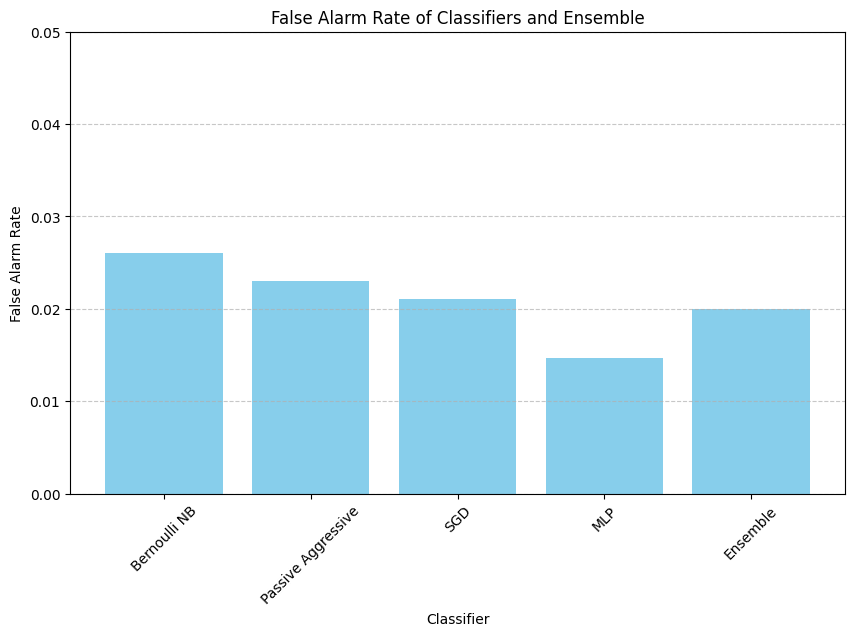

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# False Alarm Rates
classifiers = ['Bernoulli NB', 'Passive Aggressive', 'SGD', 'MLP', 'Ensemble']
fpr_values = [fpr_nb.mean(), fpr_pa.mean(), fpr_sgd.mean(), fpr_mlp.mean(), fpr_ensemble.mean()]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, fpr_values, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('False Alarm Rate')
plt.title('False Alarm Rate of Classifiers and Ensemble')
plt.ylim(0, 0.050)  # Set the y-axis limit from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


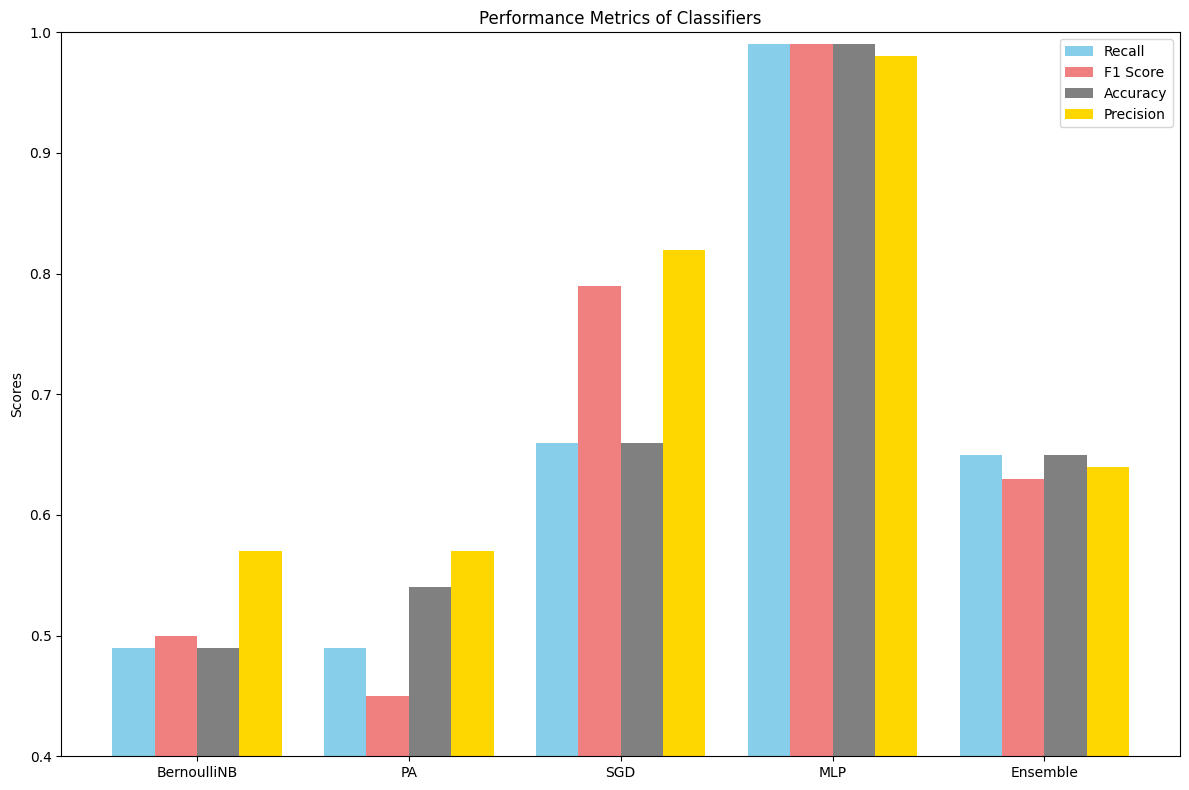

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
classifiers = ['BernoulliNB', 'PA', 'SGD', 'MLP', 'Ensemble']
recall_scores = [0.49, 0.49, 0.66, 0.99, 0.65]
f1_scores = [0.50, 0.45, 0.79, 0.99, 0.63]
accuracy_scores = [0.49, 0.54, 0.66, 0.99, 0.65]
precision_scores = [0.57, 0.57, 0.82, 0.98, 0.64]

x = np.arange(len(classifiers))

# Plot Recall Performance
plt.figure(figsize=(12, 8))
bar_width = 0.2

plt.bar(x - 1.5 * bar_width, recall_scores, width=bar_width, color='skyblue', label='Recall')
plt.bar(x - 0.5 * bar_width, f1_scores, width=bar_width, color='lightcoral', label='F1 Score')
plt.bar(x + 0.5 * bar_width, accuracy_scores, width=bar_width, color='gray', label='Accuracy')
plt.bar(x + 1.5 * bar_width, precision_scores, width=bar_width, color='gold', label='Precision')

plt.xticks(x, classifiers)
plt.ylim(0.4, 1.0)
plt.ylabel('Scores')
plt.title('Performance Metrics of Classifiers')
plt.legend()
plt.tight_layout()

plt.savefig('Performance_Metrics.png')
plt.show()
